In [49]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv(r"D:\project_results\US-Oil-import-Analysis-Python-Excel-Power-BI-main\US_crude _oil.csv")

In [51]:
df.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,1,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,1,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,1,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10
3,2009,1,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381
4,2009,1,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851


In [52]:
df.shape

(483053, 8)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483053 entries, 0 to 483052
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 483053 non-null  int64 
 1   month                483053 non-null  int64 
 2   originName           483053 non-null  object
 3   originTypeName       483053 non-null  object
 4   destinationName      483053 non-null  object
 5   destinationTypeName  483053 non-null  object
 6   gradeName            483053 non-null  object
 7   quantity             483053 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 29.5+ MB


In [54]:
df.columns

Index(['year', 'month', 'originName', 'originTypeName', 'destinationName',
       'destinationTypeName', 'gradeName', 'quantity'],
      dtype='object')

finding null values

In [55]:
df.isna().sum()

year                   0
month                  0
originName             0
originTypeName         0
destinationName        0
destinationTypeName    0
gradeName              0
quantity               0
dtype: int64

finding duplicate values

In [56]:
df.duplicated().sum()

0

data cleaning & standardising

In [57]:
# Convert the 'Year' column to a string
df['year'] = df['year'].astype(str)
df.dtypes

year                   object
month                   int64
originName             object
originTypeName         object
destinationName        object
destinationTypeName    object
gradeName              object
quantity                int64
dtype: object

In [58]:
# Defining a dictionary mapping month numbers to month names
month_names = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}



In [59]:
month_names

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [60]:
# Converting the 'Month' column to strings using the map function
df['month'] = df['month'].map(month_names)
df.head(5)

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,Jan,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,Jan,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,Jan,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10
3,2009,Jan,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381
4,2009,Jan,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851


In [61]:
df['originName'].unique()

array(['Belize', 'Algeria', 'Australia', 'United Kingdom', 'Vietnam',
       'Syria', 'Chad', 'Argentina', 'Ecuador', 'Kuwait', 'Saudi Arabia',
       'Angola', 'Gabon', 'Trinidad and Tobago', 'China',
       'Congo-Brazzaville', 'Colombia', 'Equatorial Guinea', 'Peru',
       'Azerbaijan', 'Canada', 'Guatemala', 'Thailand', 'Nigeria', 'Iraq',
       'Libya', 'Norway', 'United Arab Emirates', 'Malaysia', 'Russia',
       'Venezuela', 'Brazil', 'Mexico', 'Africa', 'Europe',
       'Asia-Pacific', 'Middle East', 'Eurasia', 'Other Americas',
       'Canada (Region)', 'OPEC', 'Non-OPEC', 'World', 'Mauritania',
       'Cameroon', 'Indonesia', 'Qatar', 'Oman', 'Egypt', "Cote d'Ivoire",
       'Bolivia', 'Kazakhstan', 'Congo-Kinshasa', 'South Africa',
       'Netherlands', 'Ghana', 'Yemen', 'Italy', 'Brunei', 'Albania',
       'Denmark', 'Papua New Guinea', 'South Sudan', 'Tunisia',
       'Barbados', 'Spain', 'Guyana', 'Panama', 'The Bahamas',
       'Country not known'], dtype=object)

In [62]:
df = df[df['originName'] != 'Country not known']
df.shape

(483018, 8)

In [63]:
# Replacing 'The Bahamas' with 'Bahamas'
df.loc[df['originName'] == 'The Bahamas', 'originName'] = 'Bahamas'

# Replacing 'South Sudan' with 'Sudan' 
df.loc[df['originName'] == 'South Sudan', 'originName'] = 'Sudan'

In [64]:
df.describe() #gives the statistical summary

,quantity
count,483018.000000
mean,2425.353745
std,6367.915241
min,1.000000
25%,359.000000
50%,804.000000
75%,2008.000000
max,141016.000000


finding outliers

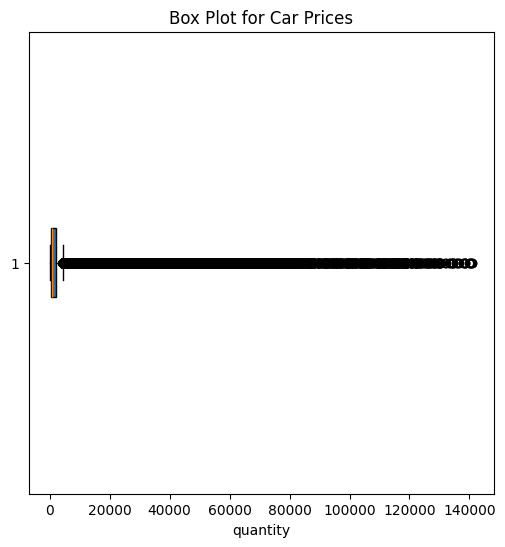

In [68]:
# Visualize the distribution using a box plot
plt.figure(figsize=(6, 6))
plt.boxplot(df['quantity'], vert=False, patch_artist=True)
plt.title('Box Plot for Car Prices')
plt.xlabel('quantity')
plt.show()

above graph shiw that there lot of outliers in the data set

In [77]:
# Calculate IQR
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['quantity'] < lower_bound) | (df['quantity'] > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()

print(f"Number of outliers: {num_outliers}")

Number of outliers: 56314


In [84]:
# Print the number of records before and after removing outliers
print('Before removing outliers:', len(df))
print('After removing outliers:', len(df) - num_outliers)

# Calculate and print the percentage of data loss
data_loss_percentage = round((num_outliers / len(df)) * 100, 2)
print('Percentage of data loss:', data_loss_percentage, "%")

Before removing outliers: 483018
After removing outliers: 426704
Percentage of data loss: 11.66 %


In [86]:
# Function to calculate Z-scores and cap upper outliers
def zscore_upper_capping(data, threshold=3):
    mean = data['quantity'].mean()
    std = data['quantity'].std()
    
    # Calculate Z-scores (individual value in the 'quantity' is taken)
    z_scores = (data['quantity'] - mean) / std
    
    # Identify upper outliers
    upper_outliers = z_scores > threshold
    
    # Cap the upper outliers
    capped_data = data.copy()
    capped_data.loc[upper_outliers, 'quantity'] = mean + threshold * std
    
    return capped_data

# Function to apply IQR capping
def iqr_upper_capping(data, factor=1.5):
    Q1 = data['quantity'].quantile(0.25)
    Q3 = data['quantity'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + factor * IQR
    
    capped_data = data.copy()
    capped_data.loc[data['quantity'] > upper_bound, 'quantity'] = upper_bound
    
    return capped_data

z_iqr_df=df.copy()
# Apply Z-score upper capping
z_capped_data = zscore_upper_capping(z_iqr_df)

# Apply IQR capping to the Z-score capped data
iqr_capped_data = iqr_upper_capping(z_capped_data)


C:\Users\akmal mirza\AppData\Local\Temp\ipykernel_13116\2280970019.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '21529.099467853623' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  capped_data.loc[upper_outliers, 'quantity'] = mean + threshold * std


In [89]:
iqr_capped_data['quantity'].describe()

count    483018.000000
mean       1416.781341
std        1445.677168
min           1.000000
25%         359.000000
50%         804.000000
75%        2008.000000
max        4481.500000
Name: quantity, dtype: float64

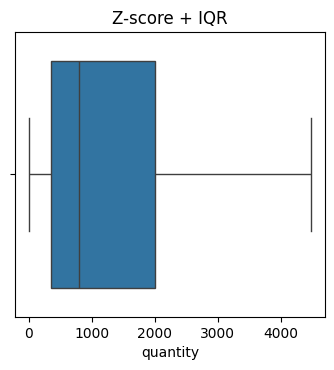

In [97]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 6)
plt.title('Z-score + IQR')
sns.boxplot(x=iqr_capped_data['quantity'])
plt.tight_layout()
plt.show()

In [100]:
iqr_capped_data.to_csv(r'D:\project_results\US-Oil-import-Analysis-Python-Excel-Power-BI-main\cleaned_file.csv',index=True)